In [ ]:
print('Hello World')

## Sphere

In [ ]:
LEN = 5
A = np.zeros((LEN,LEN,LEN))

center_x = 0.5*(LEN-1)
center_y = 0.5*(LEN-1)
center_z = 0.5*(LEN-1)
Radius = 2
for xx in range(LEN):
    for yy in range(LEN):
        for zz in range(LEN):
            dist = np.sqrt((xx - center_x)**2 + (yy - center_y)**2 + (zz - center_z)**2)
            if dist <= Radius:
                A[xx, yy, zz] = 1
print(A)
print(np.sum(A))
print(center_x)
plt.imshow(A[np.int(center_x),:,:])

## Create square and circle around chosen point

In [ ]:
# start with a 100 x 100 square grid
Nside = 100
base_indices = np.arange(Nside)
x_indices, y_indices = np.meshgrid(base_indices, base_indices)
reference_position_indices = np.array([37, 20])
# disk = np.where(np.sqrt((x_indices - reference_position_indices[0])**2 + (y_indices - reference_position_indices[1])**2)<= 10, 1, 0)
np.sqrt((x_indices - reference_position_indices[0])**2 + (y_indices - reference_position_indices[1])**2)<= 10
plt.imshow(disk)

In [ ]:
square = np.where(np.logical_and(np.abs(x_indices - reference_position_indices[0]) <= 5, np.abs(y_indices - reference_position_indices[1]) <= 5), 1, 0)
plt.imshow(square)

## np.where will ravel an array with any shape to a 1D array

In [ ]:
x = np.arange(100).reshape(10,10)
print(x)
x[3:7,1:5] = np.where(x[3:7,1:5] % 2, 0, x[3:7,1:5])
print(x)

## Slicing array with a condition

In [ ]:
x = np.arange(20)
avg_1 = x[np.logical_and(7 <= x, x <= 14)].mean()
avg_2 = np.where(np.logical_and(7 <= x, x <= 14), x, 0).mean()
avg_1 == avg_2

In [ ]:
x_values = np.arange(20)
condition = np.logical_and(7 <= x_values, x_values <= 14)
x_values[condition]

## Averaging sphere

In [ ]:
test_box = np.random.rand(101,101,101)
test_center = [0.5*(np.shape(test_box)[0]-1), 0.5*(np.shape(test_box)[1]-1), 0.5*(np.shape(test_box)[2]-1)]

true_false_index_x = np.arange(np.shape(test_box)[0])
true_false_index_y = np.arange(np.shape(test_box)[1])
true_false_index_z = np.arange(np.shape(test_box)[2])
test_x, test_y, test_z = np.meshgrid(true_false_index_x, true_false_index_y, true_false_index_z)

circle_condition = np.sqrt((test_x - test_center[0])**2 + (test_y - test_center[1])**2 + (test_z - test_center[2])**2) <= 30
inside_circle_mean = np.mean(test_box[circle_condition])
test_box = np.where(circle_condition, inside_circle_mean, test_box)

plt.imshow(test_box[:,:,21])

## Light cone: Global Average Neutral Fraction vs. Redshift

In [ ]:
lightcone = p21c.run_lightcone(
    redshift = 6,
    max_redshift = 8,
    init_box=init_cond,
    lightcone_quantities=(
        'brightness_temp',
        'xH_box',
    ),
    global_quantities=(
        'brightness_temp',
        'xH_box'
    )
)

p21c.plotting.plot_global_history(lightcone, kind='xH_box')
plt.title("Neutral Freaction vs. Redshift")

## Plotting slices of Neutral fractions.

In [ ]:
def simple_xH_plot(ion: p21c.outputs.IonizedBox, ax: plt.Axes):
    return ax.imshow(ion.xH_box[:, :, 0].T, extent=(0,200,0,200), vmin=0, vmax=1, origin='lower')

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(14,6), sharex=True, sharey=True, f)

for i, z in enumerate([20, 12, 10, 9, 8, 7, 6, 5]):
    ion = p21c.ionize_box(redshift=z, init_boxes=init_cond)
    im = simple_xH_plot(ion, ax.flatten()[i])
    ax.flatten()[i].set_title(f"z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}")
    
cbar = plt.colorbar(im, ax=ax.ravel().tolist())
cbar.set_label("Neutral Fraction")

## unblurred and blurred side by side comparison

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))

img1 = ax1.imshow(ionized[:, :, 0], extent=(0,BOX_LEN,0,BOX_LEN), origin='lower')
ax1.set_title(f"z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}", fontsize=16)
ax1.set_ylabel("y [voxel]")
ax1.set_xlabel("x [voxel]")
colorbar(img1)


img2 = ax2.imshow(Sphere_Blurring(ionized, 140, 1)[:, :, 0], extent=(0,BOX_LEN,0,BOX_LEN), origin='lower')
ax2.set_title(f"Blurred, z = {z}, Age = {cosmo_params.cosmo.age(z):.2f}", fontsize=16)
ax2.set_xlabel("x [voxel]")
colorbar(img2)

plt.tight_layout(h_pad=1)

## x, y, z slices of the blurred box

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15), dpi=200)

img1 = ax1.imshow(Sphere_blurred[0,:,:], origin='lower')
colorbar(img1)

img2 = ax2.imshow(Sphere_blurred[:,0,:], origin='lower')
colorbar(img2)

img3 = ax3.imshow(Sphere_blurred[:,:,0], origin='lower')
colorbar(img3)

plt.tight_layout(h_pad=1)

## Generator

In [ ]:
shape = (300, 100, 2740, 15, 22)
list(np.random.randint(0,side_length) for side_length in shape)
# generator = [expression for item(s) in iterable if condition]

## Calculate Average with big function broken up into smaller functions

In [ ]:
def calculate_average(box, radius, reference_position, shape='cube', weights=None):
    """
    Given an array ``box``, calculate the average over some region with radius
    ``radius`` centered on location ``reference_position``.
    """
    # define a smaller cube with sides 2*radius+1
    # condition for sphere
    # mean(box[condition_for_sphere])
    
    # retrieve the region of interest
    # region_of_interest = get_subarray(box, radius, reference_position, shape)
    # mean of region and return value
    # weights = generate_weights(region_of_interest, weights) # this is extra; don't worry for now
    # return np.average(region_of_interest, weights=weights)

## Definition of Weighted Average

In [ ]:
# weighted_average = sum(weights * array) / sum(weights)

## Plotted gaussian and compute area under the curve

In [ ]:
def Gaussian(x, sigma=1, mu=0):
    return (1/sigma/np.sqrt(2*np.pi))*(np.exp(-0.5*(((x-mu)/sigma)**2)))

import numpy as np
x = np.linspace(-1.4370396997748922,1.4370396997748922,10**3)
sigma = 1
g = Gaussian(x, sigma=sigma)
# fig = plt.figure(figsize=(15,15))
# plt.plot(x, g, [-4*sigma,-4*sigma], [-0.01, 0.2], [4*sigma,4*sigma], [-0.01, 0.2])

from scipy.integrate import simps

area = simps(g, x)
print(area)

## plotting the shells

In [ ]:
radius = 150
shell_box = top_hat_shell_averaging(distance_from_coordinate([radius*2+1]*3), radius, noise_box)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(shell_box[150,:,:], origin='lower')
colorbar(img1)

img2 = ax2.imshow(shell_box[:,150,:], origin='lower')
colorbar(img2)

img3 = ax3.imshow(shell_box[:,:,150], origin='lower')
colorbar(img3)

plt.tight_layout(h_pad=1)

## Average 4 spherical shells in a given box,  with diameter = sides of box, sphere centered on cube's center

In [ ]:
def top_hat_shell_averaging(distance_box, radius, input_box):
    
    sphere_condition =  distance_box <= radius
        
    inside_sphere_mean = np.mean(input_box[sphere_condition])  # slicing shaped array by condition will ravel the array

    shell_condition1 =  distance_box <= 0.25*radius
    shell_condition2 =  np.logical_and(distance_box <= 0.5*radius, distance_box > 0.25*radius)
    shell_condition3 =  np.logical_and(distance_box <= 0.75*radius, distance_box > 0.5*radius)
    shell_condition4 =  np.logical_and(distance_box <= radius, distance_box > 0.75*radius)
    
    output_box = np.where(shell_condition1, inside_sphere_mean, input_box)
    output_box = np.where(shell_condition2, 0.75*inside_sphere_mean, output_box)
    output_box = np.where(shell_condition3, 0.5*inside_sphere_mean, output_box)
    output_box = np.where(shell_condition4, 0.25*inside_sphere_mean, output_box)

    return output_box

## Sphere Blurring Function

In [ ]:
def Sphere_Blurring(box, radius, iteration):
    
    box = box.copy()  # make copy of input box to have a separate box
    
    dist_frm_coord_box = distance_from_coordinate([radius*2+1]*3)

    inside_sphere_mean_data_top_hat = []  # empty list for data collection
    inside_sphere_mean_data_gaussian = []
    
    for i in range(iteration):
        
        rand_coord = random_voxel(box.shape)
                
        cube_region_indices, cube_region_box = cube_centered_about_coordinate(rand_coord, radius, box)
        
        inside_sphere_mean_top_hat, sphere_condition_box = top_hat_sphere_average_value(dist_frm_coord_box, radius, cube_region_box)

        inside_sphere_mean_gaussian, sphere_condition_box = gaussian_sphere_average_value(dist_frm_coord_box, radius, cube_region_box)
        # returning sphere_condition_box only for plotting box purposes, could be removed if plotting the box is no longer required
        
        
        
#         inside_sphere_mean_data_top_hat = np.append(inside_sphere_mean_data_top_hat, inside_sphere_mean_top_hat)
#         inside_sphere_mean_data_gaussian = np.append(inside_sphere_mean_data_gaussian, inside_sphere_mean_gaussian)
#     return np.array(inside_sphere_mean_data_top_hat), np.array(inside_sphere_mean_data_gaussian)


        cube_region_box = np.where(sphere_condition_box, inside_sphere_mean_gaussian, cube_region_box)
        box[cube_region_indices] = cube_region_box
    return box

## Cube Blurring Function

In [ ]:
def Square_Blurring(box, radius, iteration):
    box = box.copy()  # make copy of input box to have a separate box
    for i in range(iteration):
        np.random.seed()  # set seed to a randome number
        
        rand_coord = np.random.randint(radius, BOX_LEN-1-radius, size=3)  # ensure that the random center point won't be at the edge of the cube
        
        cube_region = box[rand_coord[0]-radius:rand_coord[0]+radius+1, rand_coord[1]-radius:rand_coord[1]+radius+1, rand_coord[2]-radius:rand_coord[2]+radius+1]
        
        neutral_mean = np.mean(cube_region)
        
        box[rand_coord[0]-radius:rand_coord[0]+radius+1, rand_coord[1]-radius:rand_coord[1]+radius+1, rand_coord[2]-radius:rand_coord[2]+radius+1] = neutral_mean
    return box

## Computing the sphere radius to gaussian radius ratio

In [8]:
from scipy.integrate import simps
from IPython.display import clear_output
import numpy as np

In [17]:
R_g = 1.44  # place holder, guessed answer
error = 1  # place holder
while error > 10**-8:
    r = np.linspace(0, R_g, 10**8)  # array of equally spaced numbers between 0 and R_g
    g = np.exp(-r**2)*r**2
    area = simps(g,r)  # intergral of e^-r^2 * r^2 from r=0 to r=R_g
    error = np.abs(1/3-area)  # we equate the integral to 1/3
    R_g += 10**-8  # increase our guess of R_g by 10^-8 & intergrate again if error doesn't meet threshold. 
    clear_output(wait=True)
#     print(R_g)
    print(f'R_g = {R_g:.16f}, integral = {area:.16f}, error = {error:.16e}')

R_g = 1.4370397097748921, integral = 0.3333333261767219, error = 7.1566114145937831e-09


In [ ]:
from scipy.integrate import simps
import numpy as np

R_g = 1.4370396997748922  # place holder, guessed answer
error = 1  # place holder
while error > 10**-8:  # keep increasing R_g by 10^-8 while the error is below a set threshold
    r = np.linspace(0, R_g, 10**8)  # array of equally spaced numbers between 0 and R_g
    g = np.exp(-r**2)*r**2  # integrand
    area = simps(g,r)  # integral of e^-r^2 * r^2 from r=0 to r=R_g using Simpson's rule
    error = np.abs(1/3-area)  # equate the integral to 1/3, compute the error
    R_g += 10**-8  # increase our guess of R_g by 10^-8 & integrate again if error doesn't meet threshold. 
print(f'R_g = {R_g}, integral = {area}, error = {error}')  # print relevant quantities of interest.

In [21]:
print(f'R_g = {R_g},\nintegral = {area},\nerror = {error}')

R_g = 1.4370397097748921,
integral = 0.3333333261767219,
error = 7.156611414593783e-09


In [19]:
1.4370396997748922 - 1.4370397097748921

-9.99999993922529e-09

## Tuning the radius ratios of the 3 different methods

In [ ]:
var_Gaussian = np.var(gaussian)
var_sphere = np.var(sphere)
var_cube = np.var(cube)

print(var_Gaussian)
print(var_sphere)
print(var_cube)

print(abs((var_Gaussian-var_sphere)/np.mean([var_Gaussian, var_sphere])))
print(abs((var_Gaussian-var_cube)/np.mean([var_Gaussian, var_cube])))
print(abs((var_cube-var_sphere)/np.mean([var_cube, var_sphere])))

## Plotting function single plot condition

In [ ]:
fs = (gaussian1, gaussian2, [1,1,1])
fs2 = np.array(np.array([gaussian1]))
type(fs)
type(fs) is tuple
type(fs2) is tuple

## Making list of titles

In [ ]:
titles = []
for radius in radii:
    titles = np.append(titles, f'Radius = {radius}')
    
print(titles)

## Reshaping 1D array

In [ ]:
A = np.arange(1, 4)
B = np.arange(4, 7)
C = np.arange(7, 10)
print(A, B, C)
D = []
for a in A:
    for b in B:
        for c in C:
            D = np.append(D, f'{a, b, c}')
pritnt(D)
D = D.reshape(len(A), len(B), len(C))
D[:,0,:]

## Print current time

In [ ]:
import time
# time.ctime() # 'Mon Oct 18 13:35:29 2010'
time.strftime('%l:%M%p %Z on %b %d, %Y') # ' 1:36PM EDT on Oct 18, 2010'
# time.strftime('%l:%M%p %z on %b %d, %Y') # ' 1:36PM EST on Oct 18, 2010'

In [ ]:
import numpy as np
1-np.exp(-1)

## colorbar function

In [ ]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax, label="Neutral Fraction")
    plt.sca(last_axes)
    return cbar

## Creating Noise Box

In [3]:
import numpy as np
np.random.seed()
# np.random.seed(5) ; np.random.rand(10)
noise_box = np.random.rand(301, 301, 301)

## Creating plots of standard deviation of average neutral fraction distributions as a function of shell numbers and radii.

In [ ]:
def generate_distribution_standard_deviations():

    iterations = 3*10**2
    radii = np.arange(10, 100, 10)  # [10, 20, 30, ... 90]
    sigma_factors = np.arange(1, 6)  # [1, 2, 3, 4, 5]
    shell_numbers = np.arange(1, 9)  # [1, 2, 3, 4, 5, 6, 7, 8]
    stand_devs_gaussian = []  # empty list for data collection
    stand_devs_sphere = []
    stand_devs_cube = []

    for radius in radii:

        sphere = Average_Neutral_Fraction_Distribution(
                box=noise_box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_sphere'
            )

        cube = Average_Neutral_Fraction_Distribution(
                box=noise_box,
                radius=radius,
                iteration=iterations,
                blur_shape='top_hat_cube'
            )

        stand_dev_sphere = np.std(sphere)
        stand_dev_cube = np.std(cube)

        for shell_num in shell_numbers:

            stand_devs_sphere = np.append(stand_devs_sphere, stand_dev_sphere)
            stand_devs_cube = np.append(stand_devs_cube, stand_dev_cube)

            for sigma_factor in sigma_factors:

                gaussian = Average_Neutral_Fraction_Distribution(
                    box=noise_box,
                    radius=radius,
                    sigma_factor=sigma_factor,
                    iteration=iterations,
                    shell_num=shell_num,
                    blur_shape='Gaussian_sphere'
                )

                stand_dev_gaussian = np.std(gaussian)

                stand_devs_gaussian = np.append(stand_devs_gaussian, stand_dev_gaussian)

        print(f'progress = {int(round(radius*10/len(radii)))}%')

    stand_devs_gaussian = stand_devs_gaussian.reshape(len(radii), len(shell_numbers), len(sigma_factors))
    stand_devs_sphere = stand_devs_sphere.reshape(len(radii), len(shell_numbers))
    stand_devs_cube = stand_devs_cube.reshape(len(radii), len(shell_numbers))
    
    return stand_devs_gaussian, stand_devs_sphere, stand_devs_cube

## Plotting Standard Deviations

In [ ]:
stand_devs_gaussian, stand_devs_sphere, stand_devs_cube = generate_distribution_standard_deviations()


titles = []
for radius in radii:
    titles = np.append(titles, f'Radius = {radius}')
    
plots(
    x_vals=shell_numbers, 
    y1s=tuple(stand_devs_gaussian[:,:,0]),
    y2s=tuple(stand_devs_gaussian[:,:,1]),
    y3s=tuple(stand_devs_gaussian[:,:,2]),
    y4s=tuple(stand_devs_gaussian[:,:,3]),
    y5s=tuple(stand_devs_gaussian[:,:,4]),
    y6s=tuple(stand_devs_sphere), 
    y7s=tuple(stand_devs_cube),
    y1s_label='Gaus 1σ',
    y2s_label='Gaus 2σ',
    y3s_label='Gaus 3σ',
    y4s_label='Gaus 4σ',
    y5s_label='Gaus 5σ',
    y6s_label='Sphere', 
    y7s_label='Cube',
    shared_y_label='Standard Deviation', 
    shared_x_label='Number of Weighted Bins / Spherical Shells', 
    figure_shape=(3,3), 
    figure_size=(18,18), 
    title=titles, 
    shared_title=f'Standard Deviation of Average Neutral Fraction Distribution\
    (Radius Ratio 2, Random Unseeded Voxels, iterations = {iterations})',
    vertical_gap=0.1,
    horizontal_gap=0.2,
    y_notation='sci',
    share_y_axis=False,
    figure_resolution=1000  # units: dpi
)

## Number of cores running

In [ ]:
import os
print(type(os.cpu_count()))

In [ ]:
def distance_from_coordinate(box_length):
        
    index = np.arange(-0.5*(box_length-1), 0.5*(box_length+1))

    x_mesh, y_mesh, z_mesh = np.meshgrid(index, index, index, indexing='ij')
    
    distance = np.sqrt((x_mesh)**2 + (y_mesh)**2 + (z_mesh)**2)
    
    return distance

In [ ]:
distance_box = distance_from_coordinate(301)

In [ ]:
def colorbar(mappable, plot_color='white', color_bar_label='Neutral Fraction'):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.ylabel(color_bar_label, color=plot_color)
    plt.tick_params(color=plot_color, labelcolor=plot_color)
    plt.sca(last_axes)
    
    ax.tick_params(color=plot_color, labelcolor=plot_color)
    
    for spine in ax.spines.values():  # figure spine color
        spine.set_edgecolor(plot_color)
    
    return cbar

In [ ]:
color='white'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(distance_box[50,:,:], origin='lower')
colorbar(img1, color_bar_label='Distance', plot_color=color)
ax1.set_title('x = 0 plane', color=color)

img2 = ax2.imshow(distance_box[:,0,:], origin='lower')
colorbar(img2, color_bar_label='Distance', plot_color=color)
ax2.set_title('y = -50 plane', color=color)

img3 = ax3.imshow(distance_box[:,:,100], origin='lower')
colorbar(img3, color_bar_label='Distance', plot_color=color)
ax3.set_title('z = 50 plane', color=color)

plt.tight_layout(h_pad=1)

In [ ]:
def cube_centered_about_coordinate(coordinate_array, radius, box):
    box = box.copy()
    
    x_ind1 = int(coordinate_array[0]-radius)  # x-domian
    x_ind2 = int(coordinate_array[0]+radius+1)  # ending index is not inclusive
    y_ind1 = int(coordinate_array[1]-radius)  # y-domain
    y_ind2 = int(coordinate_array[1]+radius+1)
    z_ind1 = int(coordinate_array[2]-radius)  # z-domain
    z_ind2 = int(coordinate_array[2]+radius+1)
        
    if x_ind1 < 0:  # periodic boundary conditions
        x_inds = np.r_[(x_ind1+len(box)):len(box), 0:x_ind2]
    elif x_ind2 > len(box):
        x_inds = np.r_[x_ind1:len(box), 0:(x_ind2-len(box))]
    else:
        x_inds = np.r_[x_ind1:x_ind2]

    if y_ind1 < 0:
        y_inds = np.r_[(y_ind1+len(box)):len(box), 0:y_ind2]
    elif y_ind2 > len(box):
        y_inds = np.r_[y_ind1:len(box), 0:(y_ind2-len(box))]
    else:
        y_inds = np.r_[y_ind1:y_ind2]

    if z_ind1 < 0:
        z_inds = np.r_[(z_ind1+len(box)):len(box), 0:z_ind2]
    elif z_ind2 > len(box):
        z_inds = np.r_[z_ind1:len(box), 0:(z_ind2-len(box))]
    else:
        z_inds = np.r_[z_ind1:z_ind2]
            
    indices = np.ix_(x_inds, y_inds, z_inds)
        
    try:
        output_box = box[indices]
        mean = np.mean(output_box)
        box[indices] = mean
    except IndexError:
        print(f'coordinate array = {coordinate_array}')
        print(f'radius = {radius}')
        print(f'box length = {len(box)}')
        print(f'x_ind1 = {x_ind1}')
        print(f'x_ind2 = {x_ind2}')
        print(f'x_inds = {x_inds}')
        print(f'x_ind1 = {y_ind1}')
        print(f'x_ind2 = {y_ind2}')
        print(f'y_inds = {y_inds}')
        print(f'x_ind1 = {z_ind1}')
        print(f'x_ind2 = {z_ind2}')
        print(f'z_inds = {z_inds}')
        
    return box

In [ ]:
periodicBCs_box = cube_centered_about_coordinate([0, 300, 50], 100, noise_box)

In [ ]:
color='k'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(periodicBCs_box[0,:,:], origin='lower')
colorbar(img1, color_bar_label='Abitrary', plot_color=color)
ax1.set_title('x = 0 plane', color=color)

img2 = ax2.imshow(periodicBCs_box[:,300,:], origin='lower')
colorbar(img2, color_bar_label='Abitrary', plot_color=color)
ax2.set_title('y = 300 plane', color=color)

img3 = ax3.imshow(periodicBCs_box[:,:,50], origin='lower')
colorbar(img3, color_bar_label='Abitrary', plot_color=color)
ax3.set_title('z = 50 plane', color=color)

plt.tight_layout(h_pad=1)

In [ ]:
def Gaussian(x, sigma):  # μ=0, σ=1/sqrt(2), π=1
    Gaussian = np.exp(-(x/sigma)**2)
    return Gaussian

In [ ]:
def gaussian_sphere_average(distance_box, radius, input_box, shell_num, sigma_factor):
    
    mean = []

    shell_radius_edges = np.linspace(0,1,shell_num+1)
    # sigma_factor number of sigmas the weighting goes out to, sigma = radius

    
    
# ======================================================================================================================
    # Radius Ratio 1
#     shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor 
#     weight = Gaussian(x=shell_center, sigma=1)
    
    # Radius Ratio 2
    shell_center = 0.5*(shell_radius_edges[1:] + shell_radius_edges[:-1])*sigma_factor*radius
    weights = Gaussian(x=shell_center, sigma=radius)
# ======================================================================================================================


    output_box = input_box.copy()

    for ii, weight in enumerate(weights):
        condition = np.logical_and(
            distance_box <= shell_radius_edges[ii+1]*radius, 
            distance_box > shell_radius_edges[ii]*radius
        )
        inside_shell_mean = np.mean(input_box[condition])
#         mean = np.append(mean, inside_shell_mean)
        output_box = np.where(condition, weight*inside_shell_mean, output_box)
        
        
#     Gaussian_mean = np.average(mean, weights=weight)
    
    return output_box

In [ ]:
shells_box = gaussian_sphere_average(distance_box=distance_box, radius=150, input_box=noise_box, shell_num=20, sigma_factor=2)

In [ ]:
color='k'

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,15))

img1 = ax1.imshow(shells_box[150,:,:], origin='lower')
colorbar(img1, color_bar_label='Abitrary', plot_color=color)
ax1.set_title('x = 150 plane', color=color)

img2 = ax2.imshow(shells_box[:,150,:], origin='lower')
colorbar(img2, color_bar_label='Abitrary', plot_color=color)
ax2.set_title('y = 150 plane', color=color)

img3 = ax3.imshow(shells_box[:,:,150], origin='lower')
colorbar(img3, color_bar_label='Abitrary', plot_color=color)
ax3.set_title('z = 150 plane', color=color)

plt.tight_layout(h_pad=1)

In [4]:
from datetime import datetime
import time
from datetime import datetime, timedelta
from pytz import timezone
import pytz

ModuleNotFoundError: No module named 'pytz'

In [ ]:
import numpy as np
radii = np.arange(1, 11)
current_time = datetime.now()
for i in range(len(radii)):
    
    time.sleep(i+1)
    previous_time = current_time
    current_time = datetime.now()
    loop_time = current_time - previous_time
    print(f'progress = {int(round((i+1)*100/len(radii)))}%\
, local time = {current_time}, loop executed in ={loop_time}')

In [13]:
%%timeit
datetime.now()

367 ns ± 9.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [14]:
%%timeit
time.strftime('%l:%M%p %Z on %b %d, %Y') # ' 1:36PM EDT on Oct 18, 2010'

623 ns ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
%%timeit
time.ctime() # 'Mon Oct 18 13:35:29 2010'

970 ns ± 7.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [16]:
%%timeit
time.strftime('%l:%M%p %z on %b %d, %Y') # ' 1:36PM EST on Oct 18, 2010'

558 ns ± 0.523 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
datetime.now?

In [2]:
from datetime import datetime, date

In [3]:
%%timeit
start = datetime.now().time()
time.sleep(3)
end = datetime.now().time()
datetime.combine(date.min, end) - datetime.combine(date.min, start)

NameError: name 'time' is not defined

In [ ]:
from datetime import timedelta

In [ ]:
%%timeit

start = datetime.now().time()
time.sleep(3)
end = datetime.now().time()

t1 = timedelta(hours=start.hour, minutes=start.minute, seconds=start.second)
t2 = timedelta(hours=end.hour, minutes=end.minute, seconds=end.second)

duration = t2 - t1

In [32]:
BOX_LEN=300
HII_DIM=450
print(np.array([int(round(radius*((4/3/np.sqrt(np.pi))**(1/3))*13/4)) for radius in np.arange(51, 3, -3)]))  # 13/4 --> speculated correction factor
print(np.arange(51, 3, -3)*BOX_LEN/HII_DIM)
BOX_LEN/HII_DIM

[151 142 133 124 115 106  98  89  80  71  62  53  44  35  27  18]
[34. 32. 30. 28. 26. 24. 22. 20. 18. 16. 14. 12. 10.  8.  6.  4.]


0.6666666666666666

## Set logger to log caching activity


In [ ]:
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

## Version of 21cmFAST

In [1]:
print(f"Using 21cmFAST version {p21c.__version__}")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-2fa57479918c>", line 1, in <module>
    print(f"Using 21cmFAST version {p21c.__version__}")
NameError: name 'p21c' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/lustre/aoc/projects/hera/wchin/anaconda3/envs/21cmfast/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1148, in

NameError: name 'p21c' is not defined

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import py21cmfast as p21c
# import caffeine
from datetime import datetime
import time
import logging, sys, os
import tools21cm as t2c

## Number of cores running

In [2]:
print(f'Number of threads running = {os.cpu_count()}')

Number of threads running = 16


## Reset cache location 

In [3]:
p21c.config['direc'] = '/lustre/aoc/projects/hera/wchin/21cmFAST-cache'

In [4]:
cosmo_params = p21c.CosmoParams()

In [5]:
BOX_LEN=301
HII_DIM=301

user_params = p21c.UserParams(
    BOX_LEN=BOX_LEN,  # Box length in Mpc
    DIM=4*HII_DIM,      # Number of Voxels for hight resolution 
    HII_DIM=HII_DIM,  # Number of Voxels for low resolution 
    N_THREADS=os.cpu_count()
)

In [6]:
start_time = datetime.now()
print(f'Excution qued at {start_time}')

init_cond = p21c.initial_conditions(
    cosmo_params=cosmo_params,
    user_params=user_params,
)

end_time = datetime.now()
execution_time = end_time - start_time
print(f'Execution completed at {end_time}')
print(f'Execution time = {execution_time}')

Excution qued at 2020-07-22 13:07:27.050880
Execution completed at 2020-07-22 13:14:28.429142
Execution time = 0:07:01.378262


In [23]:
redshift=6.5
neutral_frac_box = p21c.ionize_box(redshift=redshift, init_boxes=init_cond).xH_box

In [33]:
r_mfpFalse, dn_mfpFalse = t2c.mfp(neutral_frac_box, boxsize=BOX_LEN, upper_lim=False)

MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 1.247003 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.


In [34]:
r_mfpTrue, dn_mfpTrue = t2c.mfp(neutral_frac_box, boxsize=BOX_LEN, upper_lim=True)

MFP method applied on 3D data (ver 1.0)
Completed: 100.0%
Program runtime: 5.830389 minutes.
The output contains a tuple with three values: r, rdP/dr
The curve has been normalized.


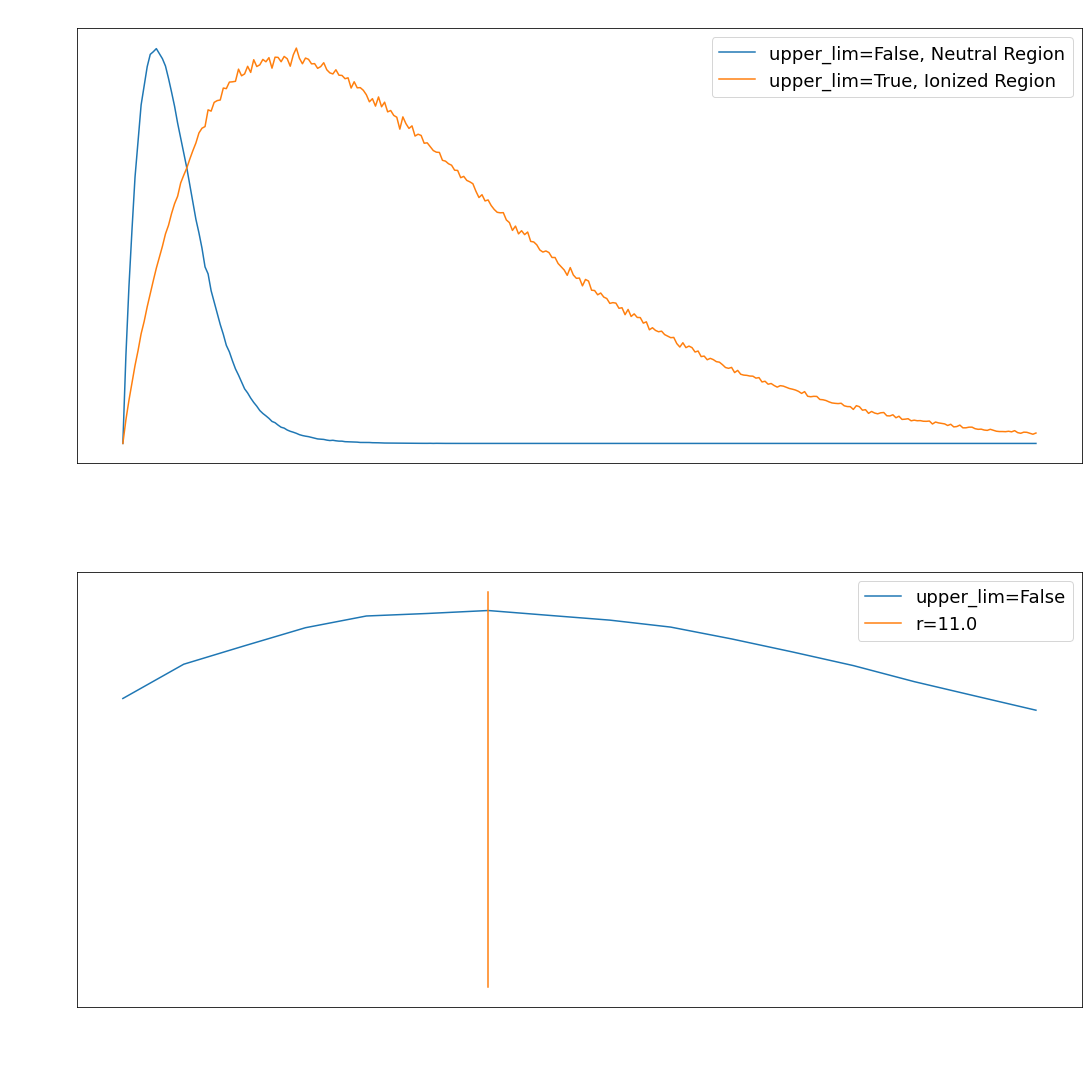

In [84]:
color = 'white'

fig, axes = plt.subplots(2, 1, figsize=(18, 18), gridspec_kw={"hspace":0.25},
)
axes.flatten()[0].plot(r_mfpFalse, dn_mfpFalse, label='upper_lim=False, Neutral Region')
axes.flatten()[0].plot(r_mfpTrue, dn_mfpTrue, label='upper_lim=True, Ionized Region')
axes.flatten()[0].tick_params(color=color, labelcolor=color)
axes.flatten()[0].set_xlabel('$R$ (Mpc)', color=color)
axes.flatten()[0].set_ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
axes.flatten()[0].set_title(f'Region Size Distribution of Neutral Fraction Box, z={redshift}', color=color)
axes.flatten()[0].legend()
axes.flatten()[1].plot(r_mfpFalse[5:21], dn_mfpFalse[5:21], label='upper_lim=False')
axes.flatten()[1].plot([r_mfpFalse[np.argmax(dn_mfpFalse)]]*2, [min(dn_mfpFalse),1.05*max(dn_mfpFalse)], label=f'r={r_mfpFalse[np.argmax(dn_mfpFalse)]}')
axes.flatten()[1].tick_params(color=color, labelcolor=color)
axes.flatten()[1].set_xlabel('$R$ (Mpc)', color=color)
axes.flatten()[1].set_ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
axes.flatten()[1].set_title('Zoomed in on upper_lim=False', color=color)
axes.flatten()[1].legend()
plt.rcParams['font.size'] = 18

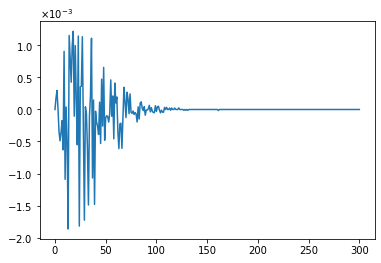

In [26]:
plt.plot(r_mfpIon, dn_mfpIon-dn_mfp)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)


In [44]:
r_spa, dn_spa = t2c.spa(xHII, boxsize=BOX_LEN, nscales=100)


Comepleted 1.0 %
Comepleted 2.0 %
Comepleted 3.0 %
Comepleted 4.0 %
Comepleted 5.0 %
Comepleted 6.0 %
Comepleted 7.0 %
Comepleted 8.0 %
Comepleted 9.0 %
Comepleted 10.0 %
Comepleted 11.0 %
Comepleted 12.0 %
Comepleted 13.0 %
Comepleted 14.0 %
Comepleted 15.0 %
Comepleted 16.0 %
Comepleted 17.0 %
Comepleted 18.0 %
Comepleted 19.0 %
Comepleted 20.0 %
Comepleted 21.0 %
Comepleted 22.0 %
Comepleted 23.0 %
Comepleted 24.0 %
Comepleted 25.0 %
Comepleted 26.0 %
Comepleted 27.0 %
Comepleted 28.0 %
Comepleted 29.0 %
Comepleted 30.0 %
Comepleted 31.0 %
Comepleted 32.0 %
Comepleted 33.0 %
Comepleted 34.0 %
Comepleted 35.0 %
Comepleted 36.0 %
Comepleted 37.0 %
Comepleted 38.0 %
Comepleted 39.0 %
Comepleted 40.0 %
Comepleted 41.0 %
Comepleted 42.0 %
Comepleted 43.0 %
Comepleted 44.0 %
Comepleted 45.0 %
Comepleted 46.0 %
Comepleted 47.0 %
Comepleted 48.0 %
Comepleted 49.0 %
Comepleted 50.0 %
Comepleted 51.0 %
Comepleted 52.0 %
Comepleted 53.0 %
Comepleted 54.0 %
Comepleted 55.0 %
Comepleted 56.0 %
C

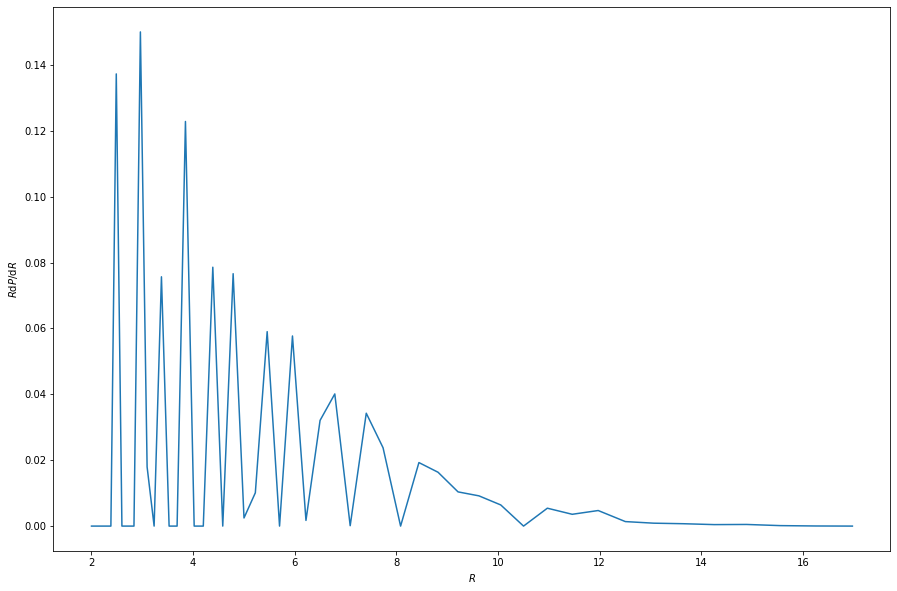

In [51]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(r_spa[:50], dn_spa[:50])

plt.xlabel('$R$')
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$')

plt.show()

In [53]:
labelled_map, volumes = t2c.fof(xHII, use_skimage=True)
fof_dist = t2c.plot_fof_sizes(volumes, bins=30, boxsize=BOX_LEN)

Program runtime: 0.015110 minutes.
The output is a tuple containing output-map and volume-list array respectively.
The output is Size, Size**2 dP/d(Size), lowest value


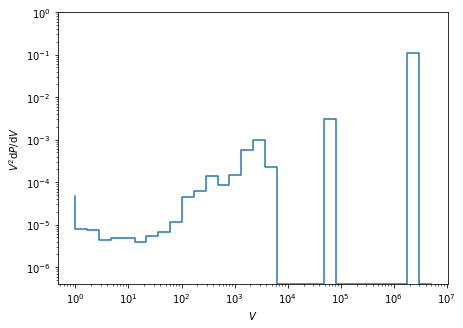

In [54]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.step(fof_dist[0], fof_dist[1])
plt.xscale('log')
plt.yscale('log')
plt.ylim(fof_dist[2],1)

plt.xlabel('$V$')
plt.ylabel('$V^2\mathrm{d}P/\mathrm{d}V$')

plt.show()

In [59]:
A = np.arange(6).reshape(2,3)
more_then_1_indeces = np.argwhere(A>1)

In [60]:
more_then_1_indeces.shape

(4, 2)

In [61]:
np.random.randint(0, high=5, size=5)

array([1, 1, 1, 2, 0])

In [62]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import sys

def mfp3d(arr, xth=0.5, iterations=10000000, verbose=True):
    #3D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info = arr.shape  # dimentions of the data box
    longest = max(arr.shape)  # longest axis
    num_sz  = np.zeros(longest)  # place holder with length of the longest axis

    ar  = np.zeros(arr.shape)  # place holder with data box shape
    ar[arr >= xth] = 1  # generating a binary box, xth = threshold

    loc = np.argwhere(ar == 1)  # locations of ionized cells
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)  # iterations number of random ionized locations
    #==================================================================================
    thetas   = np.random.randint(0, 360, size=iterations)  # should it be 0 to 180 deg?
    #==================================================================================

    phis     = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)*np.cos(phis*np.pi/180)  # dx
    ms       = np.sin(thetas*np.pi/180)*np.sin(phis*np.pi/180)  # dy
    ns       = np.cos(thetas*np.pi/180)  # dz
    xs,ys,zs = loc[rand_loc,0],loc[rand_loc,1],loc[rand_loc,2]  # slicing ionized locations with [randome coordinate, (x,y,z)]

    interp_func = RegularGridInterpolator((np.arange(info[0]), np.arange(info[1]), np.arange(info[2])), ar, bounds_error=False, fill_value=0)

    #==================================================================================
    for rr in range(longest):  # steping 1 step along the ray for all directions.
    # should it be sqrt(longestX^2, longestY^2, longestZ^2)?
    # motivation: no rays will be longer than the longest axis?
    #==================================================================================

        xs,ys,zs = xs+ls,ys+ms,zs+ns  # steping by dx, dy, dz
        pts    = np.vstack((xs,ys,zs)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)  # coordinates that are outsise ionized regions.
        num_sz[rr] = check.shape[0]  # record the number of new rays terminated in this loop
        xs,ys,zs = np.delete(xs, check),np.delete(ys, check),np.delete(zs, check)  # for the terminated rays,
        ls,ms,ns = np.delete(ls, check),np.delete(ms, check),np.delete(ns, check)  # delete the forward step 
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px

def mfp2d(arr, xth=0.5, iterations=1000000, verbose=True):
    #2D interpolation is required
    #RegularGridInterpolator in scipy(>0.14) is used to do the interpolation

    info    = arr.shape
    longy	= max([info[0], info[1]])
    longest = int(np.sqrt(2)*longy)
    num_sz  = np.zeros(longest)

    ar  = np.zeros(arr.shape)
    ar[arr >= xth] = 1

    loc = np.argwhere(ar == 1)
    rand_loc = np.random.randint(0, high=loc.shape[0], size=iterations)
    thetas   = np.random.randint(0, 360, size=iterations)
    ls       = np.sin(thetas*np.pi/180)
    ms       = np.cos(thetas*np.pi/180)

    xs,ys    = loc[rand_loc,0],loc[rand_loc,1]

    interp_func = RegularGridInterpolator((np.arange(info[0]), np.arange(info[1])), ar, bounds_error=False, fill_value=0)

    for rr in range(longest):
        xs,ys  = xs+ls,ys+ms
        pts    = np.vstack((xs,ys)).T
        vals   = interp_func(pts)
        check  = np.argwhere(vals<=0.5)
        num_sz[rr] = check.shape[0]
        xs,ys  = np.delete(xs, check),np.delete(ys, check)
        ls,ms  = np.delete(ls, check),np.delete(ms, check)
        if verbose:
            perc = (rr+1)*100/longest
            msg  = '%.1f'%perc + '%'
            loading_verbose(msg)
        if not xs.size: break
    msg  = '100.0' + '%'
    loading_verbose(msg)
    size_px = np.arange(longest)
    return num_sz, size_px


def loading_verbose(string):
    msg = ("Completed: " + string )
    sys.stdout.write('\r'+msg)
    sys.stdout.flush()

In [68]:
np.vstack((1,1,1)).T

array([[1, 1, 1]])

In [69]:
np.hstack((1,1,1)).T

array([1, 1, 1])

In [5]:
t2c.conv.LB?

In [8]:
bins = [10,2]
np.array(bins).size

2

In [9]:
r_min = 1
r_max = 100
bins = 10
10**np.linspace(np.log10(r_min), np.log10(r_max), bins)

array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])

In [83]:
x = np.linspace(-10*3, 10*3, 10*3)
noise = np.random.randn(10*3)*3
f = x**5 +noise

In [84]:
noise.shape

(30,)

In [85]:
import scipy as sp

In [86]:
f1 = sp.interpolate.interp1d(x, f, kind='linear')

In [87]:
f1s = f1(x)

In [88]:
x.shape

(30,)

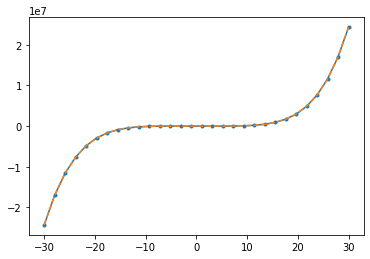

In [82]:
plt.plot(x, f, '.-', label='Orignal')
plt.plot(x, f1s, '--', label='Linear interpolate')